## Spring 6: Un poco de estadística

Usaremos los datos del Spring 5 y trrabajaremos sobre algunos de los campos del dataframe.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
archivos=list()
for i in range(31):
    archivos.append("SP1("+str(i)+").csv")
print(archivos)

['SP1(0).csv', 'SP1(1).csv', 'SP1(2).csv', 'SP1(3).csv', 'SP1(4).csv', 'SP1(5).csv', 'SP1(6).csv', 'SP1(7).csv', 'SP1(8).csv', 'SP1(9).csv', 'SP1(10).csv', 'SP1(11).csv', 'SP1(12).csv', 'SP1(13).csv', 'SP1(14).csv', 'SP1(15).csv', 'SP1(16).csv', 'SP1(17).csv', 'SP1(18).csv', 'SP1(19).csv', 'SP1(20).csv', 'SP1(21).csv', 'SP1(22).csv', 'SP1(23).csv', 'SP1(24).csv', 'SP1(25).csv', 'SP1(26).csv', 'SP1(27).csv', 'SP1(28).csv', 'SP1(29).csv', 'SP1(30).csv']


In [3]:
datos_liga=pd.read_csv("./datos/"+archivos[0])

In [4]:
for i in range(1,25):
    temp=pd.read_csv("./datos/"+archivos[i])
    datos_liga=datos_liga.append(temp,ignore_index=True)

In [5]:
datos_liga.describe

<bound method NDFrame.describe of       Div        Date   Time     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0     SP1  13/08/2021  20:00     Valencia       Getafe     1     0   H     1   
1     SP1  14/08/2021  18:30        Cadiz      Levante     1     1   D     0   
2     SP1  14/08/2021  18:30     Mallorca        Betis     1     1   D     1   
3     SP1  14/08/2021  21:00       Alaves  Real Madrid     1     4   A     0   
4     SP1  14/08/2021  21:00      Osasuna      Espanol     0     0   D     0   
...   ...         ...    ...          ...          ...   ...   ...  ..   ...   
9495  SP1    18/05/08    NaN  Real Madrid      Levante     5     2   H     3   
9496  SP1    18/05/08    NaN   Recreativo   Valladolid     1     1   D     0   
9497  SP1    18/05/08    NaN    Santander      Osasuna     1     0   H     0   
9498  SP1    18/05/08    NaN      Sevilla   Ath Bilbao     4     1   H     1   
9499  SP1    18/05/08    NaN     Valencia   Ath Madrid     3     1   H     2   

     

Bien , veamos algún campo que pueda resultar interesante para estudiar (desechando tema apuestas), crearé un dataframe con los campos de interés únicamente (color verde)

Key to results data:

Div = League Division    
Date = Match Date (dd/mm/yy)    
Time = Time of match kick off    
<font color='green'>  
HomeTeam = Home Team  
AwayTeam = Away Team   
FTHG and HG = Full Time Home Team Goals   
FTAG and AG = Full Time Away Team Goals   
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)     
HTHG = Half Time Home Team Goals     
HTAG = Half Time Away Team Goals   
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)</font>     

Match Statistics (where available)    
Attendance = Crowd Attendance    
Referee = Match Referee    
<font color='green'>  
HS = Home Team Shots   
AS = Away Team Shots    
HST = Home Team Shots on Target    
AST = Away Team Shots on Target    
HHW = Home Team Hit Woodwork    
AHW = Away Team Hit Woodwork    
HC = Home Team Corners     
AC = Away Team Corners </font>  



In [6]:
datos_liga=datos_liga[["HomeTeam","AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HC","AC"]]


In [7]:
datos_liga.describe

<bound method NDFrame.describe of          HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  HST  \
0        Valencia       Getafe     1     0   H     1     0   H   4  22    2   
1           Cadiz      Levante     1     1   D     0     1   A   7  12    2   
2        Mallorca        Betis     1     1   D     1     0   H   6  10    2   
3          Alaves  Real Madrid     1     4   A     0     0   D  11  19    4   
4         Osasuna      Espanol     0     0   D     0     0   D  14  10    1   
...           ...          ...   ...   ...  ..   ...   ...  ..  ..  ..  ...   
9495  Real Madrid      Levante     5     2   H     3     0   H  15  15    8   
9496   Recreativo   Valladolid     1     1   D     0     1   A  10   9    4   
9497    Santander      Osasuna     1     0   H     0     0   D   7   3    2   
9498      Sevilla   Ath Bilbao     4     1   H     1     1   D   6   3    5   
9499     Valencia   Ath Madrid     3     1   H     2     0   H  15  16   10   

      AST  HC  AC

In [8]:
datos_liga[0:3]

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC
0,Valencia,Getafe,1,0,H,1,0,H,4,22,2,4,1,9
1,Cadiz,Levante,1,1,D,0,1,A,7,12,2,3,2,4
2,Mallorca,Betis,1,1,D,1,0,H,6,10,2,1,4,3


Ok , todo parece correcto . Renombramos los índices para dar algo de contexto a lo que vemos.

In [9]:
datos_liga.rename(columns={"HomeTeam":"Local","AwayTeam":"Visitante","FTHG":"Goles Local","FTAG":"goles Visitante",
"HS":"Tiros Local","AS":"Tiros visitante","HST":"tiros a puerta local","AST":"Tiros a puerta visitante"})

,Local,Visitante,Goles Local,goles Visitante,FTR,HTHG,HTAG,HTR,Tiros Local,Tiros visitante,tiros a puerta local,Tiros a puerta visitante,HC,AC
0,Valencia,Getafe,1,0,H,1,0,H,4,22,2,4,1,9
1,Cadiz,Levante,1,1,D,0,1,A,7,12,2,3,2,4
2,Mallorca,Betis,1,1,D,1,0,H,6,10,2,1,4,3
3,Alaves,Real Madrid,1,4,A,0,0,D,11,19,4,7,0,4
4,Osasuna,Espanol,0,0,D,0,0,D,14,10,1,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,Real Madrid,Levante,5,2,H,3,0,H,15,15,8,7,5,5
9496,Recreativo,Valladolid,1,1,D,0,1,A,10,9,4,2,7,8
9497,Santander,Osasuna,1,0,H,0,0,D,7,3,2,0,6,1
9498,Sevilla,Ath Bilbao,4,1,H,1,1,D,6,3,5,1,0,0


Veamos algunas estadísticas:

Primero usando la libreria numpy

In [22]:
tiros_local=np.array(datos_liga["HS"])

calculamos las estadísticas sobre los tiros de los equipos locales

In [90]:
round(np.mean(tiros_local))

14

In [31]:
round(np.median(tiros_local))

13

Que la media y la mediana tengan valores parecidos nos puede indicar que los datos siguen una distribución normal. Más adelante lo podremos corroborar

In [32]:
round(np.std(tiros_local),2)

5.03

Ahora usaremos la libreria _statistics_

In [34]:
import statistics as stat

In [38]:
print(stat.mean(tiros_local))

13


Que no cunda el pánico obtenemos un valor diferente a numpy , por un tema de redondeo ya que el valor con numpy es de 13.6 y hago que lo redondee.Si lo fuerzo a un número entero obtengo lo mismo

In [93]:
int(np.mean(tiros_local))
#continuamos con statistics

13

In [36]:
print(stat.stdev(tiros_local))

5.0


In [39]:
print(stat.median(tiros_local))

13.0


In [40]:
print(stat.multimode(tiros_local))

[12]


Una forma visual de ver la moda es mediante un histograma, es decir una tabla de frecuencias.Que lo podemos hacer mediante tablas o gráficamente:

In [67]:
datos_liga.groupby(["HS"]).count()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,AS,HST,AST,HC,AC
HS,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2
2,13,13,13,13,13,13,13,13,13,13,13,13,13
3,28,28,28,28,28,28,28,28,28,28,28,28,28
4,117,117,117,117,117,117,117,117,117,117,117,117,117
5,145,145,145,145,145,145,145,145,145,145,145,145,145
6,242,242,242,242,242,242,242,242,242,242,242,242,242
7,370,370,370,370,370,370,370,370,370,370,370,370,370
8,512,512,512,512,512,512,512,512,512,512,512,512,512
9,604,604,604,604,604,604,604,604,604,604,604,604,604


(array([ 160., 1269., 2021., 3027., 1532., 1000.,  339.,  107.,   35.,
          10.]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <BarContainer object of 10 artists>)

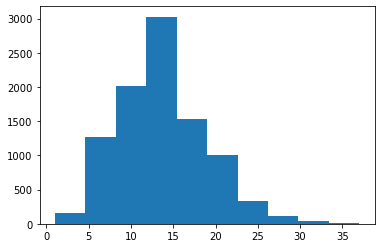

In [45]:
plt.hist(datos_liga["HS"])

(array([ 15.,  28., 117., 145., 242., 370., 512., 604., 651., 766., 792.,
        782., 779., 674., 587., 484., 461., 357., 289., 192., 162., 128.,
         84.,  74.,  53.,  46.,  36.,  25.,  11.,   8.,  10.,   6.,   4.,
          2.,   4.]),
 array([ 1.        ,  2.02857143,  3.05714286,  4.08571429,  5.11428571,
         6.14285714,  7.17142857,  8.2       ,  9.22857143, 10.25714286,
        11.28571429, 12.31428571, 13.34285714, 14.37142857, 15.4       ,
        16.42857143, 17.45714286, 18.48571429, 19.51428571, 20.54285714,
        21.57142857, 22.6       , 23.62857143, 24.65714286, 25.68571429,
        26.71428571, 27.74285714, 28.77142857, 29.8       , 30.82857143,
        31.85714286, 32.88571429, 33.91428571, 34.94285714, 35.97142857,
        37.        ]),
 <BarContainer object of 35 artists>)

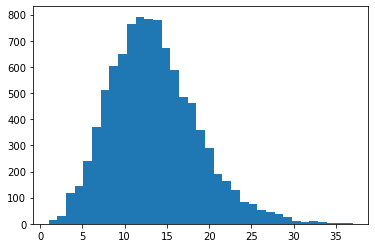

In [62]:

plt.hist(datos_liga["HS"],bins=35)

Comprobamos que la moda esta en el 12. Como habíamos comentado al calcular la media y la mediana , la distribución de frecuencias se asemeja a la distribución normal , con algo de cola.

Ahora que hemos hecho la estadística despciptiva básica, vamos a proceder a intentar ver si hay alguna relación entre los valores.

## Exercici 2 : Relacionando

Aprovechando los datos del apartado anterior , vamos a usar los datos , hacer algunas hipotesis y aplicar la correlación para ver que sucede:

__Hipótesis 1__ : cuantos más disparos hace un equipo , más goles debe de marcar. Correlación positiva

__Hipótesis 2__: cuanto más disparos con peligro , más goles (debería tener mejor correlación que la hypothesis 1)

__Hipótesis 3__: Si genero una serie de numero aleatorio y lo intento correlacionar , no deberia haber relación , es decir el coeficiente debería ser 0

Para ello usaremos el coeficiente de correlación de Pearson

**Hypotesis 1**

In [82]:
np.corrcoef(datos_liga["HS"],datos_liga["FTHG"])[0,1]

0.2864436110247026

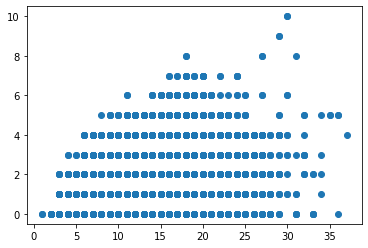

In [83]:
plt.scatter(datos_liga["HS"],datos_liga["FTHG"])

La correlación es positiva ,indicando cierta relación, pero nada que impresione demasiado.

Probemos la Hipótesis 2

In [69]:
np.corrcoef(datos_liga["HST"],datos_liga["FTHG"])[0,1]


0.5908642600918869

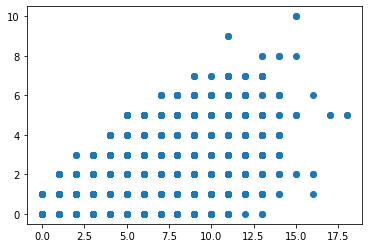

In [84]:
plt.scatter(datos_liga["HST"],datos_liga["FTHG"])

Parece que nuesra lógica tiene sentido y obtenemos una valor más positivo que nos hace pensar en una mayor correlación.Pasemos a la hipótesis 3.

In [78]:
import random
boleo=[]
for i in range(9500):
    boleo.append(random.randint(1, 100))



In [81]:
np.corrcoef(datos_liga["HS"],boleo)[0,1]

0.0009850799862002855

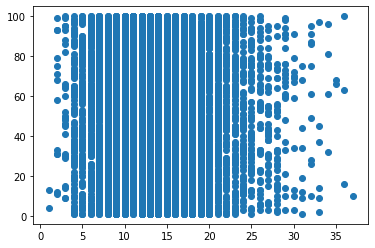

In [88]:
plt.scatter(datos_liga["HS"],boleo)

Efectivamente volvemos a verificar nuestras hipótesis al obtener un valor prácticamente de 0 .Lo cual era lo que buscabamos al usar una matriz aleatorizada .

y para el final una correlación perfecta (haciendo trampa) :

In [86]:
np.corrcoef(datos_liga["HST"],datos_liga["HST"])[0,1]

1.0

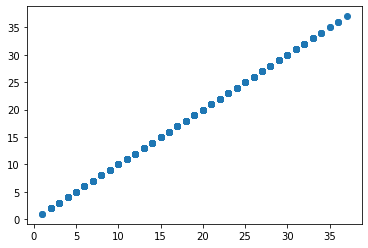

In [87]:
plt.scatter(datos_liga["HS"],datos_liga["HS"])

Evidentemente los datos se parecen a si mismos de forma perfecta.